In [150]:
import re
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

warnings.filterwarnings("ignore")

In [151]:
df = pd.read_excel("Coffee_shop_data.xlsx")
df.head()

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price
0,1,Brew Haven,8 Old Shore Place,Oakland,California,94616,415-810-4769,4.5,Male,72463,3.31000
1,2,Bean Bliss,6650 Clarendon Crossing,Stockton,California,95210,209-701-1665,5.0,Female,87117,5.35000
2,3,Caffeine Cove,7281 Buell Road,Fresno,California,93773,559-137-3554,4.7,Male,86394,4.15000
3,4,Mug Magic,670 Jackson Avenue,Torrance,California,90510,818-789-5573,4.3,Male,88343,5.34000
4,5,Daily Grind,37 Ludington Terrace,San Diego,California,92196,619-354-2389,1.6,Male,77795,4.51175


In [152]:
population = pd.read_csv('population.csv',skiprows=[0])
population.head()

,Geography,Label for GEO_ID,Race/Ethnic Group,Population Groups,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
0,8600000US89010,ZCTA5 89010,1,Total population,172,NaN,51,69,19,12,12,4,5
1,8600000US89019,ZCTA5 89019,1,Total population,1164,NaN,412,421,134,83,57,32,25
2,8600000US89060,ZCTA5 89060,1,Total population,4144,NaN,1106,1714,550,361,222,95,96
3,8600000US89061,ZCTA5 89061,1,Total population,2109,NaN,469,936,283,206,112,62,41
4,8600000US89439,ZCTA5 89439,1,Total population,671,NaN,193,314,88,55,17,2,2


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID no.           1000 non-null   int64  
 1   Business Name    1000 non-null   object 
 2   Street address   1000 non-null   object 
 3   City             1000 non-null   object 
 4   State            1000 non-null   object 
 5   Zip Code         1000 non-null   int64  
 6   Phone            1000 non-null   object 
 7   Rating           1000 non-null   float64
 8   Gender majority  1000 non-null   object 
 9   Median Salary    1000 non-null   int64  
 10  Latte Price      1000 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 86.1+ KB


In [154]:
df.describe()

,ID no.,Zip Code,Rating,Median Salary,Latte Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,92976.163000,3.784600,81182.842000,5.061491
std,288.819436,1706.943177,1.150717,5142.670356,0.352002
min,1.000000,90005.000000,1.000000,72001.000000,3.090000
25%,250.750000,91751.750000,3.200000,76776.000000,4.830175
50%,500.500000,92883.000000,4.240000,81113.000000,5.062450
75%,750.250000,94257.000000,4.580000,85684.000000,5.310025
max,1000.000000,96154.000000,5.000000,89978.000000,6.480000


In [155]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Geography                          1705 non-null   object 
 1   Label for GEO_ID                   1705 non-null   object 
 2   Race/Ethnic Group                  1705 non-null   int64  
 3   Population Groups                  1705 non-null   object 
 4   Total                              1705 non-null   int64  
 5   Errata of Total                    0 non-null      float64
 6   Total!!1-person household          1705 non-null   int64  
 7   Total!!2-person household          1705 non-null   int64  
 8   Total!!3-person household          1705 non-null   int64  
 9   Total!!4-person household          1705 non-null   int64  
 10  Total!!5-person household          1705 non-null   int64  
 11  Total!!6-person household          1705 non-null   int64

In [156]:
population.describe()

,Race/Ethnic Group,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
count,1705.0,1705.000000,0.0,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000
mean,1.0,7380.679179,NaN,1719.078592,2144.630499,1199.246921,1105.011144,610.421114,297.739589,304.551320
std,0.0,6834.537992,NaN,1883.978056,1996.729629,1155.478884,1119.177945,694.102841,388.344813,515.173094
min,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,766.000000,NaN,188.000000,275.000000,105.000000,78.000000,42.000000,18.000000,11.000000
50%,1.0,5898.000000,NaN,1159.000000,1708.000000,932.000000,787.000000,369.000000,139.000000,86.000000
75%,1.0,12614.000000,NaN,2685.000000,3591.000000,2015.000000,1838.000000,968.000000,437.000000,377.000000
max,1.0,33342.000000,NaN,19444.000000,9845.000000,5563.000000,5604.000000,4118.000000,2491.000000,4467.000000


In [157]:
df.shape

(1000, 11)

In [158]:
population.shape

(1705, 13)

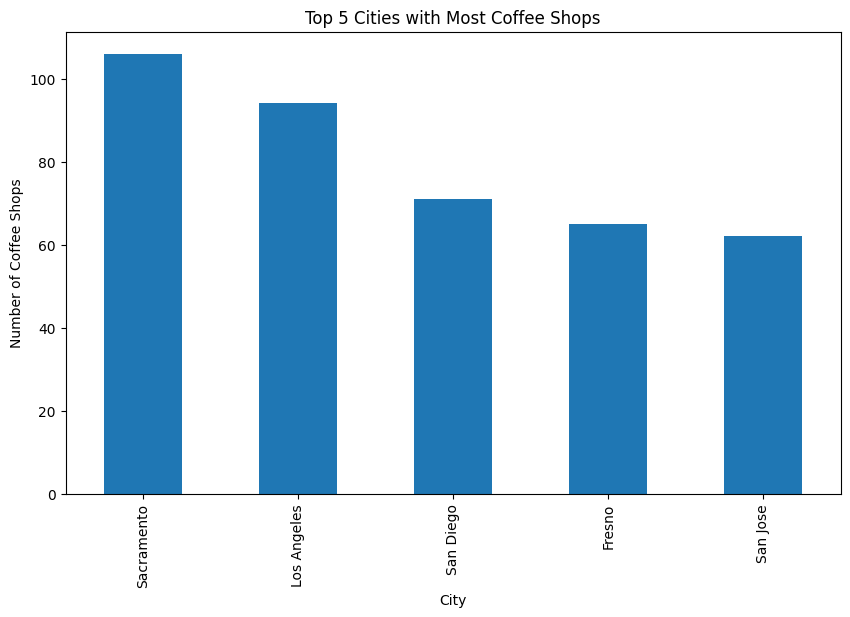

In [159]:
ax=df['City'].value_counts().head(5).plot(kind='bar', figsize=(10, 6))
ax.set_title('Top 5 Cities with Most Coffee Shops')
ax.set_xlabel('City')
ax.set_ylabel('Number of Coffee Shops')
plt.show()

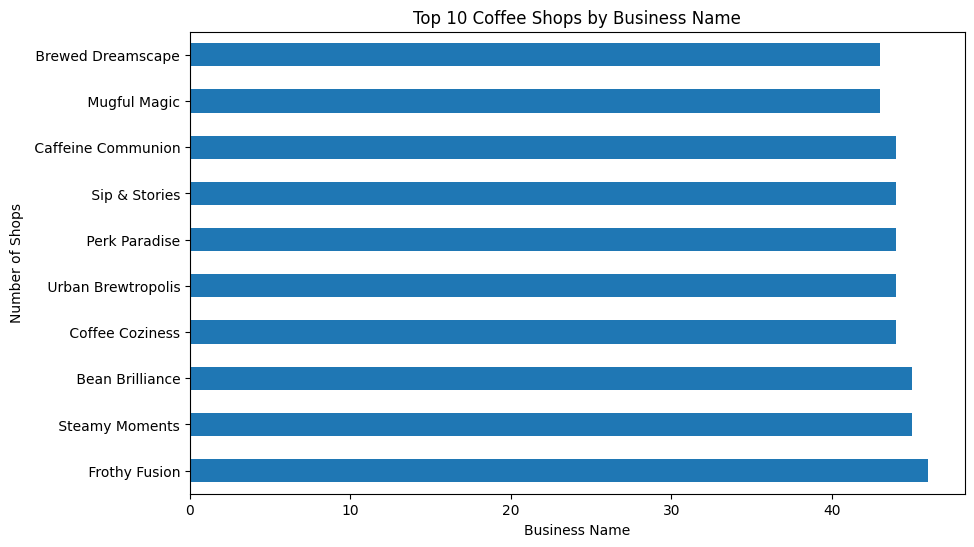

In [160]:
ax = df['Business Name'].value_counts().head(10).plot(kind='barh', figsize=(10, 6))
ax.set_title('Top 10 Coffee Shops by Business Name')
ax.set_xlabel('Business Name')
ax.set_ylabel('Number of Shops')
plt.show()

In [161]:
df.isna().sum()
population.isna().sum()

Geography                               0
Label for GEO_ID                        0
Race/Ethnic Group                       0
Population Groups                       0
Total                                   0
Errata of Total                      1705
Total!!1-person household               0
Total!!2-person household               0
Total!!3-person household               0
Total!!4-person household               0
Total!!5-person household               0
Total!!6-person household               0
Total!!7-or-more-person household       0
dtype: int64

In [162]:
population.dropna(axis=1,inplace=True)

In [163]:
population.shape

(1705, 12)

In [164]:
population.shape

(1705, 12)

In [165]:
df['Zip Code'] = df['Zip Code'].astype(str)
population['Geography'] = population['Geography'].astype(str)

In [166]:
def get_zipcode(geocode):
    pattern = r'\d{5}'
    match = re.search(pattern, geocode)
    if match:
        zip_code = match.group(0)
    return zip_code

In [167]:
population['Zip Code'] = population['Label for GEO_ID'].apply(get_zipcode)

In [168]:
cafe_data = df.copy()
df_new = pd.merge(cafe_data, population, on='Zip Code', how='left')

In [169]:
df_new

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,...,Race/Ethnic Group,Population Groups,Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
0,1,Brew Haven,8 Old Shore Place,Oakland,California,94616,415-810-4769,4.50,Male,72463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Bean Bliss,6650 Clarendon Crossing,Stockton,California,95210,209-701-1665,5.00,Female,87117,...,1.0,Total population,11180.0,1995.0,2469.0,1841.0,1873.0,1339.0,786.0,877.0
2,3,Caffeine Cove,7281 Buell Road,Fresno,California,93773,559-137-3554,4.70,Male,86394,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Mug Magic,670 Jackson Avenue,Torrance,California,90510,818-789-5573,4.30,Male,88343,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Daily Grind,37 Ludington Terrace,San Diego,California,92196,619-354-2389,1.60,Male,77795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Sip & Stories,7 Mockingbird Park,San Bernardino,California,92424,909-425-9949,1.78,Male,82834,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,997,Perk Paradise,8 Cody Street,Burbank,California,91520,818-845-1356,4.50,Male,80753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,998,Urban Brewtropolis,141 Burrows Place,Los Angeles,California,90035,323-785-4094,3.00,Male,87604,...,1.0,Total population,12814.0,4807.0,4269.0,1702.0,1155.0,519.0,215.0,147.0
998,999,Steamy Moments,42004 Bellgrove Terrace,Orange,California,92867,714-506-9394,4.50,Male,74340,...,1.0,Total population,13284.0,1989.0,3743.0,2431.0,2551.0,1328.0,615.0,627.0


In [170]:
df_new.isnull().sum()

ID no.                                 0
Business Name                          0
Street address                         0
City                                   0
State                                  0
Zip Code                               0
Phone                                  0
Rating                                 0
Gender majority                        0
Median Salary                          0
Latte Price                            0
Geography                            588
Label for GEO_ID                     588
Race/Ethnic Group                    588
Population Groups                    588
Total                                588
Total!!1-person household            588
Total!!2-person household            588
Total!!3-person household            588
Total!!4-person household            588
Total!!5-person household            588
Total!!6-person household            588
Total!!7-or-more-person household    588
dtype: int64

In [171]:
df_new.shape

(1000, 23)

In [172]:
columns = cafe_data.columns.values.tolist()+['Total']
df_og = df_new[columns]
df_og = df_og.rename(columns={'Total':'Population'})

In [173]:
df_og

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price,Population
0,1,Brew Haven,8 Old Shore Place,Oakland,California,94616,415-810-4769,4.50,Male,72463,3.31000,NaN
1,2,Bean Bliss,6650 Clarendon Crossing,Stockton,California,95210,209-701-1665,5.00,Female,87117,5.35000,11180.0
2,3,Caffeine Cove,7281 Buell Road,Fresno,California,93773,559-137-3554,4.70,Male,86394,4.15000,NaN
3,4,Mug Magic,670 Jackson Avenue,Torrance,California,90510,818-789-5573,4.30,Male,88343,5.34000,NaN
4,5,Daily Grind,37 Ludington Terrace,San Diego,California,92196,619-354-2389,1.60,Male,77795,4.51175,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Sip & Stories,7 Mockingbird Park,San Bernardino,California,92424,909-425-9949,1.78,Male,82834,6.48000,NaN
996,997,Perk Paradise,8 Cody Street,Burbank,California,91520,818-845-1356,4.50,Male,80753,3.65000,NaN
997,998,Urban Brewtropolis,141 Burrows Place,Los Angeles,California,90035,323-785-4094,3.00,Male,87604,4.64000,12814.0
998,999,Steamy Moments,42004 Bellgrove Terrace,Orange,California,92867,714-506-9394,4.50,Male,74340,3.82000,13284.0


In [174]:
df_og.dropna(axis=0,inplace=True)
df_og.reset_index(drop=True, inplace=True)

In [175]:
df_og

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price,Population
0,2,Bean Bliss,6650 Clarendon Crossing,Stockton,California,95210,209-701-1665,5.00,Female,87117,5.35000,11180.0
1,6,Espresso Elegance,8427 Atwood Road,Visalia,California,93291,559-929-4731,1.20,Female,78753,5.31765,15310.0
2,10,Perk Palace,7 David Junction,Fresno,California,93726,559-323-2365,4.20,Female,80973,5.30665,13942.0
3,11,The Coffee Cartel,6018 Rockefeller Center,Orange,California,92867,714-292-8390,1.90,Male,74340,4.43900,13284.0
4,14,Grindhouse Cafe,7846 Cherokee Junction,Visalia,California,93291,559-253-9426,4.50,Male,78753,5.27165,15310.0
...,...,...,...,...,...,...,...,...,...,...,...,...
407,982,Perk Paradise,4 Park Meadow Crossing,Van Nuys,California,91411,818-584-8823,4.00,Female,76034,4.99170,9177.0
408,983,Urban Brewtropolis,2459 Golden Leaf Place,Santa Monica,California,90405,818-215-2671,4.82,Female,86920,4.98200,14376.0
409,985,Caffeine Communion,40 Sommers Parkway,San Jose,California,95133,408-304-3646,4.04,Female,78176,4.64680,7365.0
410,998,Urban Brewtropolis,141 Burrows Place,Los Angeles,California,90035,323-785-4094,3.00,Male,87604,4.64000,12814.0


In [176]:
coffee_shop_count = df_og['Zip Code'].value_counts().reset_index()
coffee_shop_count.columns = ['Zip Code', 'Coffee Shop Count']

In [177]:
coffee_shop_count['Zip Code'] = coffee_shop_count['Zip Code'].astype(str)
coffee_shop_count

,Zip Code,Coffee Shop Count
0,90040,11
1,93111,10
2,90505,10
3,92410,10
4,92867,9
...,...,...
74,92612,2
75,94121,2
76,95118,1
77,94611,1


In [178]:
coffee_shop_count = pd.merge(coffee_shop_count,df_og, on='Zip Code', how='left')

In [179]:
coffee_shop_count.shape

(412, 13)

In [180]:
coffee_shop_count

,Zip Code,Coffee Shop Count,ID no.,Business Name,Street address,City,State,Phone,Rating,Gender majority,Median Salary,Latte Price,Population
0,90040,11,81,Frothy Fables,91 Hallows Pass,Los Angeles,California,323-771-5440,4.50,Male,76485,5.17625,3317.0
1,90040,11,111,Java Generations,700 Fisk Way,Los Angeles,California,760-199-1218,4.54,Female,76485,4.76225,3317.0
2,90040,11,311,Frothy Fantasy,3 Toban Lane,Los Angeles,California,213-230-3805,4.20,Male,76485,5.14025,3317.0
3,90040,11,428,Urban Brewtropolis,18 Towne Circle,Los Angeles,California,714-101-5092,4.03,Female,76485,4.97425,3317.0
4,90040,11,446,Mugful Magic,233 Homewood Terrace,Los Angeles,California,760-315-9020,1.42,Male,76485,5.14825,3317.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,94121,2,659,The Roast Refinery,26967 Stone Corner Place,San Francisco,California,858-344-2510,5.00,Female,80124,4.72020,17295.0
408,94121,2,764,The Roast Refinery,684 Rockefeller Pass,San Francisco,California,415-398-5800,4.15,Male,80124,4.71220,17295.0
409,95118,1,34,Steam & Sip,202 Dovetail Trail,San Jose,California,408-329-4863,4.90,Male,82098,4.84690,11261.0
410,94611,1,254,Perk Paradise,651 Butternut Way,Oakland,California,415-224-5089,4.01,Female,76243,4.95815,16923.0


In [181]:
sorted_df = coffee_shop_count.sort_values(by=['Population','Rating','Coffee Shop Count','Median Salary'],ascending=[False,True,True,False]).reset_index(drop=True)

In [182]:
sorted_df.head()

,Zip Code,Coffee Shop Count,ID no.,Business Name,Street address,City,State,Phone,Rating,Gender majority,Median Salary,Latte Price,Population
0,94110,5,628,Coffee Coziness,31866 Pierstorff Pass,San Francisco,California,562-612-3530,2.22,Female,74020,5.045,27128.0
1,94110,5,885,Espresso Exuberance,34598 7th Park,San Francisco,California,415-810-6762,3.50,Male,74020,5.047,27128.0
2,94110,5,734,The Roast Refinery,31158 Almo Plaza,San Francisco,California,415-206-9019,4.40,Male,74020,5.059,27128.0
3,94110,5,924,Steamy Moments,13 Dennis Place,San Francisco,California,415-674-3262,4.50,Male,74020,4.779,27128.0
4,94110,5,25,Brewed to Perfection,7 2nd Alley,San Francisco,California,415-555-1601,4.70,Male,74020,4.581,27128.0


In [183]:
lst=[]
for i in range(len(sorted_df)):
    if len(lst)!=5:
        if (sorted_df['Zip Code'][i]) not in lst:
            lst.append(sorted_df['Zip Code'][i])

top_5_zip_codes_df = sorted_df[sorted_df['Zip Code'].isin(lst)]

top_5_zip_codes_df

,Zip Code,Coffee Shop Count,ID no.,Business Name,Street address,City,State,Phone,Rating,Gender majority,Median Salary,Latte Price,Population
0,94110,5,628,Coffee Coziness,31866 Pierstorff Pass,San Francisco,California,562-612-3530,2.22,Female,74020,5.04500,27128.0
1,94110,5,885,Espresso Exuberance,34598 7th Park,San Francisco,California,415-810-6762,3.50,Male,74020,5.04700,27128.0
2,94110,5,734,The Roast Refinery,31158 Almo Plaza,San Francisco,California,415-206-9019,4.40,Male,74020,5.05900,27128.0
3,94110,5,924,Steamy Moments,13 Dennis Place,San Francisco,California,415-674-3262,4.50,Male,74020,4.77900,27128.0
4,94110,5,25,Brewed to Perfection,7 2nd Alley,San Francisco,California,415-555-1601,4.70,Male,74020,4.58100,27128.0
5,90805,4,951,Sip & Stories,69 Russell Way,Long Beach,California,323-120-8513,3.00,Male,88140,5.47900,26056.0
6,90805,4,313,Urban Java Jolt,9177 Golf Course Terrace,Long Beach,California,310-503-8782,3.89,Female,88140,5.31900,26056.0
7,90805,4,267,Perk & Peace,37 Hovde Circle,Long Beach,California,562-522-2591,4.31,Female,88140,5.02100,26056.0
8,90805,4,565,Caffeine Communion,6 Tennyson Hill,Long Beach,California,323-343-7913,4.37,Female,88140,5.20700,26056.0
9,95823,3,197,Sip & Splendor,8912 Northwestern Park,Sacramento,California,510-392-1185,4.30,Female,73165,4.96825,22470.0


In [184]:
sorted_df.columns

Index(['Zip Code', 'Coffee Shop Count', 'ID no.', 'Business Name',
       'Street address', 'City', 'State', 'Phone', 'Rating', 'Gender majority',
       'Median Salary', 'Latte Price', 'Population'],
      dtype='object')

In [185]:
sorted_df.drop(columns=['Street address','City','Phone','ID no.','Business Name','Gender majority','State'], inplace=True)

In [186]:
sorted_df

,Zip Code,Coffee Shop Count,Rating,Median Salary,Latte Price,Population
0,94110,5,2.22,74020,5.04500,27128.0
1,94110,5,3.50,74020,5.04700,27128.0
2,94110,5,4.40,74020,5.05900,27128.0
3,94110,5,4.50,74020,4.77900,27128.0
4,94110,5,4.70,74020,4.58100,27128.0
...,...,...,...,...,...,...
407,95064,6,4.44,88439,5.04195,381.0
408,95064,6,4.56,88439,5.77595,381.0
409,91210,3,1.59,89948,5.60740,178.0
410,91210,3,4.30,89948,5.48340,178.0


In [ ]:
X = sorted_df.drop('Latte Price', axis=1)
y = sorted_df['Latte Price']

In [188]:
int_col = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_col = X.select_dtypes(include=['object']).columns.tolist()

In [189]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [190]:
sc = StandardScaler()
x_train_scaled = pd.DataFrame(sc.fit_transform(x_train[int_col]),columns=int_col)
x_test_scaled = pd.DataFrame(sc.transform(x_test[int_col]),columns=int_col)
x_train.shape

(329, 5)

In [191]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x_train_encoded = pd.DataFrame(encoder.fit_transform(x_train[cat_col]),columns=cat_col)
x_test_encoded = pd.DataFrame(encoder.transform(x_test[cat_col]),columns=cat_col)
x_train_encoded.shape

(329, 1)

In [192]:
# Combine numerical and encoded categorical features
x_train_new = pd.concat([x_train_scaled, x_train_encoded], axis=1).reset_index(drop=True)
x_test_new = pd.concat([x_test_scaled, x_test_encoded], axis=1).reset_index(drop=True)

In [193]:
x_train_new

,Coffee Shop Count,Rating,Median Salary,Population,Zip Code
0,-0.956798,-0.819555,1.316537,2.552122,14
1,-0.097899,-1.929763,0.006557,1.115372,37
2,-0.956798,0.556735,-0.589896,-1.808247,29
3,0.761001,-2.177495,-1.000874,-1.776818,62
4,-0.527349,0.464983,-0.014490,0.519061,17
...,...,...,...,...,...
324,0.331551,0.786117,0.171550,0.931042,3
325,-1.386248,0.850344,1.087276,0.567819,11
326,0.331551,0.978798,1.601233,-0.317812,41
327,2.049350,0.162199,-0.873653,-1.310982,6


In [198]:
models = {
    'Linear Regression' : LinearRegression(),
    'Random Forest' : RandomForestRegressor(),
    'Gradient Boosting' : GradientBoostingRegressor()
}

In [199]:
param_grid = {
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 10]},
}

In [201]:
for model_name, model in models.items():
    if model_name in param_grid:
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X,y)

        models[model_name] = grid_search.best_estimator_

In [202]:
for model_name, model in models.items():
    model.fit(x_train_new, y_train)

In [207]:
for model_name, model in models.items():
    y_pred = model.predict(x_test_new)
    print(f"{model_name} Metrics:")
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R-squared:", r2_score(y_test, y_pred))
    print()

Linear Regression Metrics:
Mean Absolute Error: 0.2100647596409863
Mean Squared Error: 0.06177098015569482
R-squared: 0.40622108690502445

Random Forest Metrics:
Mean Absolute Error: 0.2225610713562634
Mean Squared Error: 0.07365662469989463
R-squared: 0.2919692961596003

Gradient Boosting Metrics:
Mean Absolute Error: 0.21302248196338375
Mean Squared Error: 0.06410410599948738
R-squared: 0.38379371204147017



In [218]:
zip_codes_df= top_5_zip_codes_df.drop(['Zip Code', 'Latte Price','Business Name','Street address','City','State','Phone','Gender majority','ID no.'], axis=1)
zip_codes_df= sc.transform(zip_codes_df)
zip_codes_df

array([[-0.52734864, -1.53522643, -1.33687174,  2.73424345],
       [-0.52734864, -0.36079174, -1.33687174,  2.73424345],
       [-0.52734864,  0.46498266, -1.33687174,  2.73424345],
       [-0.52734864,  0.55673537, -1.33687174,  2.73424345],
       [-0.52734864,  0.74024079, -1.33687174,  2.73424345],
       [-0.9567984 , -0.81955529,  1.31653656,  2.55212249],
       [-0.9567984 , -0.00295617,  1.31653656,  2.55212249],
       [-0.9567984 ,  0.38240522,  1.31653656,  2.55212249],
       [-0.9567984 ,  0.43745684,  1.31653656,  2.55212249],
       [-1.38624816,  0.37322995, -1.497542  ,  1.9429007 ],
       [-1.38624816,  0.85034404, -1.497542  ,  1.9429007 ],
       [-1.38624816,  0.96044729, -1.497542  ,  1.9429007 ],
       [-0.09789888,  0.07962127, -1.69917848,  1.8413071 ],
       [-0.09789888,  0.20807507, -1.69917848,  1.8413071 ],
       [-0.09789888,  0.25395142, -1.69917848,  1.8413071 ],
       [-0.09789888,  0.31817832, -1.69917848,  1.8413071 ],
       [-0.09789888,  0.